# **Task 1**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"
test = "/content/drive/MyDrive/AI and ML/FruitinAmazon/test"

In [9]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image, UnidentifiedImageError

In [4]:
class_names = sorted(os.listdir(train))

if not class_names:
    print("Class directories not found.")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [6]:
corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

if corrupted_images:
    print("\nCorrupted Images:")
    for img in corrupted_images:
        print(img)
else:
    print("\nCorrupted images not found.")



Corrupted images not found.


In [7]:
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)

print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [8]:
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if images:
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

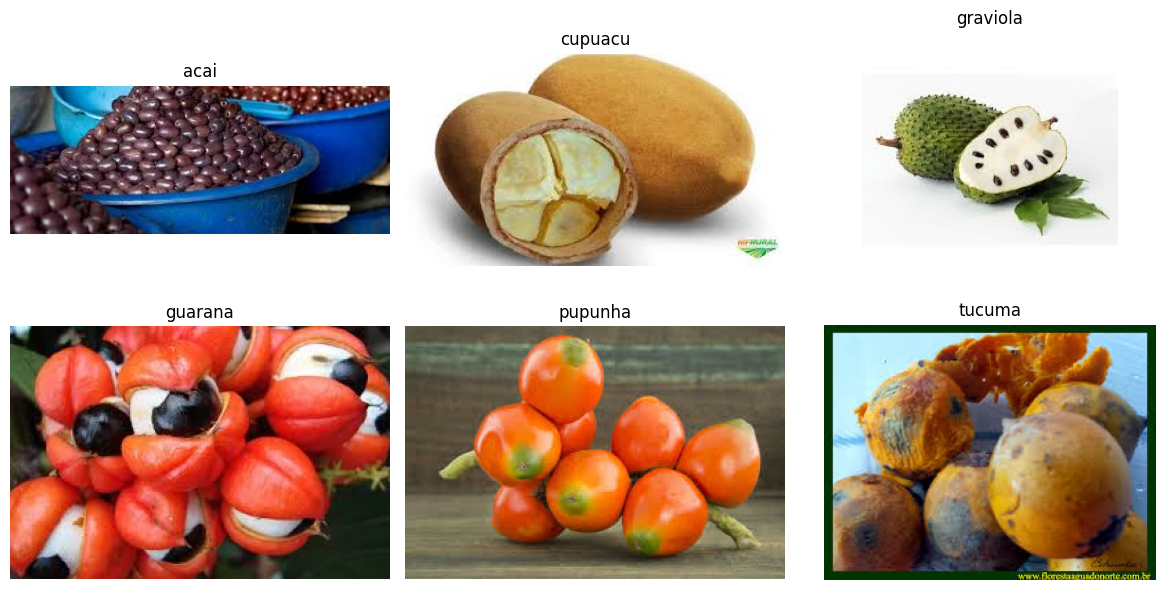

In [10]:
import matplotlib.image as mpimg

num_classes = len(selected_images)
cols = (num_classes + 1) // 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [11]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [12]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.2708 - loss: 144.4087

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 668ms/step - accuracy: 0.2656 - loss: 162.1256 - val_accuracy: 0.1667 - val_loss: 189.7688
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.2049 - loss: 229.8129

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.2057 - loss: 223.3184 - val_accuracy: 0.2222 - val_loss: 44.5910
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.1956 - loss: 73.3947

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step - accuracy: 0.1918 - loss: 73.8722 - val_accuracy: 0.1667 - val_loss: 18.0100
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2894 - loss: 30.0858

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2934 - loss: 29.3443 - val_accuracy: 0.4444 - val_loss: 7.2786
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4606 - loss: 6.9924

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4566 - loss: 6.9605 - val_accuracy: 0.2222 - val_loss: 6.2587
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.4155 - loss: 2.7228

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.4123 - loss: 2.7086 - val_accuracy: 0.2778 - val_loss: 2.2924
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.6539 - loss: 0.8644

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step - accuracy: 0.6606 - loss: 0.8550 - val_accuracy: 0.3333 - val_loss: 1.7745
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - accuracy: 0.6732 - loss: 0.8692 - val_accuracy: 0.6111 - val_loss: 1.8257
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.7522 - loss: 0.8193 - val_accuracy: 0.3889 - val_loss: 2.1210
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 810ms/step - accuracy: 0.8828 - loss: 0.6463 - val_accuracy: 0.3333 - val_loss: 2.1240
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 737ms/step - accuracy: 0.9123 - loss: 0.3928 - val_accuracy: 0.4444 - val_loss: 2.0439
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - accuracy: 0.9813 - loss: 0.2073 - val_accuracy: 0.4444 - val_loss: 1.8930
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.9891 - loss: 0.1172 - val_accuracy: 0.3333 - val_loss: 2.2909
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 1.0000 - loss: 0.0553 - val_accuracy: 0.4444 - val_loss

In [15]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.3333 - loss: 1.7745
Test Accuracy: 0.3333
Test Loss: 1.7745


(1.7744683027267456, 0.3333333432674408)

In [16]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [17]:
from sklearn.metrics import classification_report

In [18]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
              precision    recall  f1-score   support

        acai       0.50      0.33      0.40         3
     cupuacu       0.29      0.50      0.36         4
    graviola       0.00      0.00      0.00         1
     guarana       0.67      0.67      0.67         3
     pupunha       0.33      0.25      0.29         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.33        18
   macro avg       0.30      0.29      0.29        18
weighted avg       0.33      0.33      0.32        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [20]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [21]:
model = Sequential([
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2245 - loss: 2.5493

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.2274 - loss: 2.5415 - val_accuracy: 0.2222 - val_loss: 1.7856
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3750 - loss: 1.5650

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3750 - loss: 1.5823 - val_accuracy: 0.2222 - val_loss: 1.7852
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.4023 - loss: 1.5376 - val_accuracy: 0.2222 - val_loss: 1.8440
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4900 - loss: 1.6006 - val_accuracy: 0.2222 - val_loss: 1.9479
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5256 - loss: 1.2528 - val_accuracy: 0.2222 - val_loss: 2.0485
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5955 - loss: 1.1192 - val_accuracy: 0.2222 - val_loss: 2.1603
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6367 - loss: 0.9723 - val_accuracy: 0.2222 - val_loss: 2.2515
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6840 - loss: 0.8647 - val_accuracy: 0.2222 - val_loss: 2.3004
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6033 - loss: 1.1037 - val_accuracy: 0.2222 - val_loss: 2.3342
Epoch 10/50
3/3 ━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task 2**

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

In [25]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [26]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1412 - loss: 20.0110

3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - accuracy: 0.1337 - loss: 20.0142 - val_accuracy: 0.0000e+00 - val_loss: 6.5024
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1846 - loss: 13.4902

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.1871 - loss: 13.5994 - val_accuracy: 0.1667 - val_loss: 5.1776
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1962 - loss: 13.4205

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.1888 - loss: 13.4543 - val_accuracy: 0.1667 - val_loss: 4.4633
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.2297 - loss: 9.1544  

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 13s/step - accuracy: 0.2313 - loss: 9.1415 - val_accuracy: 0.1667 - val_loss: 4.2010
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2101 - loss: 10.2767  

3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.2096 - loss: 10.3218 - val_accuracy: 0.2222 - val_loss: 4.1362
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.2413 - loss: 9.3479 - val_accuracy: 0.2778 - val_loss: 4.1787
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.3316 - loss: 9.2435 - val_accuracy: 0.3333 - val_loss: 4.2995
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.3307 - loss: 7.9387 - val_accuracy: 0.3889 - val_loss: 4.1986
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3455 - loss: 8.1518

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.3424 - loss: 8.0596 - val_accuracy: 0.3889 - val_loss: 3.9006
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4109 - loss: 8.0680

3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - accuracy: 0.4054 - loss: 8.1696 - val_accuracy: 0.4444 - val_loss: 3.5731
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4352 - loss: 7.0558

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.4340 - loss: 7.0773 - val_accuracy: 0.4444 - val_loss: 3.3422
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4207 - loss: 5.7426

3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.4162 - loss: 5.8023 - val_accuracy: 0.3889 - val_loss: 3.1814
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4138 - loss: 5.1764

3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.4214 - loss: 5.0975 - val_accuracy: 0.3889 - val_loss: 3.0752
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3351 - loss: 5.9594

3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.3346 - loss: 6.0090 - val_accuracy: 0.3889 - val_loss: 2.9747
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3588 - loss: 6.5815

3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.3663 - loss: 6.3204 - val_accuracy: 0.5000 - val_loss: 2.8656
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5457 - loss: 4.4094

3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.5412 - loss: 4.3748 - val_accuracy: 0.5556 - val_loss: 2.8118
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.5590 - loss: 3.6527 - val_accuracy: 0.6111 - val_loss: 2.8211
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.5356 - loss: 4.2133 - val_accuracy: 0.6111 - val_loss: 2.8880
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.6289 - loss: 3.0739 - val_accuracy: 0.6111 - val_loss: 2.9499
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.5590 - loss: 3.2124 - val_accuracy: 0.6111 - val_loss: 3.0331
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.4970 - loss: 3.5705 - val_accuracy: 0.6111 - val_loss: 3.1441
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5556 - loss: 2.8118
Transfer Learning Model Accuracy: 0.5556
Transfer Learning Model Loss: 2.8118

Classification Report:
              precision    recall  f1-score   support

        acai       0.67      0.67  

In [27]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2199 - loss: 1.9208 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 25s/step - accuracy: 0.2205 - loss: 1.9182 - val_accuracy: 0.0556 - val_loss: 1.9799
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2442 - loss: 1.7774 

3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 20s/step - accuracy: 0.2491 - loss: 1.7795 - val_accuracy: 0.0556 - val_loss: 1.9535
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2095 - loss: 1.8383 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.2127 - loss: 1.8281 - val_accuracy: 0.0556 - val_loss: 1.9294
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.2101 - loss: 1.8647 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 21s/step - accuracy: 0.2096 - loss: 1.8635 - val_accuracy: 0.0556 - val_loss: 1.9083
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.1181 - loss: 1.8543 

3/3 ━━━━━━━━━━━━━━━━━━━━ 87s 25s/step - accuracy: 0.1302 - loss: 1.8496 - val_accuracy: 0.0556 - val_loss: 1.8925
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1406 - loss: 1.9148 

3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 24s/step - accuracy: 0.1367 - loss: 1.9114 - val_accuracy: 0.0556 - val_loss: 1.8813
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.1094 - loss: 1.9378 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 25s/step - accuracy: 0.1133 - loss: 1.9269 - val_accuracy: 0.0556 - val_loss: 1.8684
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2049 - loss: 1.8089 

3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 20s/step - accuracy: 0.2057 - loss: 1.8105 - val_accuracy: 0.0556 - val_loss: 1.8544
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2043 - loss: 1.8253 

3/3 ━━━━━━━━━━━━━━━━━━━━ 89s 25s/step - accuracy: 0.2088 - loss: 1.8167 - val_accuracy: 0.1111 - val_loss: 1.8430
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3692 - loss: 1.7205 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 21s/step - accuracy: 0.3741 - loss: 1.7161 - val_accuracy: 0.1667 - val_loss: 1.8355
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.2708 - loss: 1.7542 

3/3 ━━━━━━━━━━━━━━━━━━━━ 94s 26s/step - accuracy: 0.2656 - loss: 1.7573 - val_accuracy: 0.1667 - val_loss: 1.8282
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.1997 - loss: 1.7483 

3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 25s/step - accuracy: 0.2018 - loss: 1.7492 - val_accuracy: 0.1667 - val_loss: 1.8201
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2095 - loss: 1.7305 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 24s/step - accuracy: 0.2127 - loss: 1.7294 - val_accuracy: 0.2222 - val_loss: 1.8103
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2789 - loss: 1.6944 

3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 21s/step - accuracy: 0.2856 - loss: 1.6971 - val_accuracy: 0.2778 - val_loss: 1.8029
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3738 - loss: 1.6798 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 24s/step - accuracy: 0.3811 - loss: 1.6726 - val_accuracy: 0.3889 - val_loss: 1.7961
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.2350 - loss: 1.7253 

3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 25s/step - accuracy: 0.2352 - loss: 1.7297 - val_accuracy: 0.3889 - val_loss: 1.7904
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3079 - loss: 1.6078 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 24s/step - accuracy: 0.3212 - loss: 1.6053 - val_accuracy: 0.3889 - val_loss: 1.7834
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3455 - loss: 1.6003 

3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 21s/step - accuracy: 0.3424 - loss: 1.5972 - val_accuracy: 0.4444 - val_loss: 1.7762
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3762 - loss: 1.6531 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 24s/step - accuracy: 0.3689 - loss: 1.6481 - val_accuracy: 0.4444 - val_loss: 1.7723
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3848 - loss: 1.6362 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 21s/step - accuracy: 0.3859 - loss: 1.6335 - val_accuracy: 0.4444 - val_loss: 1.7711
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 90s 24s/step - accuracy: 0.2374 - loss: 1.6973 - val_accuracy: 0.4444 - val_loss: 1.7723
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3547 - loss: 1.5856 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 25s/step - accuracy: 0.3563 - loss: 1.5858 - val_accuracy: 0.4444 - val_loss: 1.7709
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3501 - loss: 1.5992 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 24s/step - accuracy: 0.3494 - loss: 1.5996 - val_accuracy: 0.4444 - val_loss: 1.7690
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3559 - loss: 1.5929 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 20s/step - accuracy: 0.3503 - loss: 1.5954 - val_accuracy: 0.3889 - val_loss: 1.7623
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.4167 - loss: 1.5761 

3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 24s/step - accuracy: 0.4062 - loss: 1.5779 - val_accuracy: 0.3889 - val_loss: 1.7538
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3889 - loss: 1.6306 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 24s/step - accuracy: 0.3958 - loss: 1.6255 - val_accuracy: 0.3889 - val_loss: 1.7507
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.4149 - loss: 1.5989 

3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 25s/step - accuracy: 0.4154 - loss: 1.5984 - val_accuracy: 0.3889 - val_loss: 1.7493
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.3495 - loss: 1.5789 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 24s/step - accuracy: 0.3524 - loss: 1.5755 - val_accuracy: 0.4444 - val_loss: 1.7474
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.3692 - loss: 1.5871 

3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 25s/step - accuracy: 0.3741 - loss: 1.5814 - val_accuracy: 0.4444 - val_loss: 1.7467
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.4740 - loss: 1.5190 

3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 24s/step - accuracy: 0.4805 - loss: 1.5177 - val_accuracy: 0.4444 - val_loss: 1.7444
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.4444 - loss: 1.7444

Transfer Learning Model Accuracy: 0.4444
Transfer Learning Model Loss: 1.7444

Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         3
     cupuacu       1.00      0.75      0.86         4
    graviola       0.14      1.00      0.25         1
     guarana       0.67      0.67      0.67         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.50      0.67      0.57         3

    accuracy                           0.44        18
   macro avg       0.38      0.51      0.39        18
weighted avg       0.42      0.44      0.41        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
